# Week 4 Homework
## Titanic: From Data Exploration to Advanced Imputation & Boosting

**Workflow:**
1.  **Exploratory Data Analysis (EDA):** Visualize correlations and survival patterns.
2.  **Feature Engineering:** Extract titles, create family stats, and **encode categorical variables**.
3.  **Smart Imputation:** Train a Regressor to predict missing ages (vs. simple median filling).
4.  **Model Zoo:** Benchmark 5 Tree-based models (Decision Tree, RF, AdaBoost, XGBoost, LightGBM).
5.  **Optimization:** Tune hyperparameters and interpret Feature Importance.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/LeHoangViet03/Fintech-CYTech/main/Titanic_train.csv'
df = pd.read_csv(url)
print(df.head())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

## Part 1: Exploratory Data Analysis (EDA)

Before touching any models, we must understand the data structure and relationships.

**Tasks:**
1.  **Missing Data Visualization:** Use a heatmap or bar chart to visualize where data is missing.
2.  **Survival Analysis:** Plot the survival rate by `Sex`, `Pclass`, `Parch`, `SibSp`, and `Embarked` and give comments.
3.  **Correlation Matrix:** Calculate and plot the correlation between numerical features (`Age`, `Fare`, `Parch`, `SibSp`, `Survived`).
    * *Question: Which features correlate with Survival? Give comments*

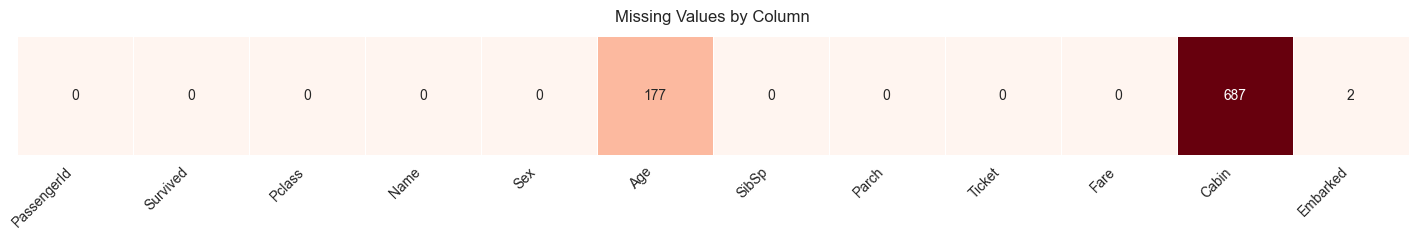

In [20]:
na_counts = df.isna().sum().to_frame(name="Missing values").T

plt.figure(figsize=(1.2 * len(df.columns), 2.5))

sns.heatmap(
    na_counts,
    annot=True,
    fmt="d",
    cmap="Reds",
    linewidths=0.5,
    linecolor="white",
    cbar=False,
    annot_kws={"size": 10}
)

plt.xticks(rotation=45, ha="right")
plt.yticks([])
plt.title("Missing Values by Column", fontsize=12, pad=10)

plt.tight_layout()
plt.show()